# Import Libraries

In [977]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Import Dataset

In [978]:
data = pd.read_csv("threads_reviews.csv")
data.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


# Feature Engineering

In [979]:
data = data.iloc[:, :-1]
data.head()

,source,review_description,rating
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2
1,Google Play,Pretty good for a first launch!! Its easy to u...,3
2,Google Play,"For a brand new app, it's very well optimized....",3
3,Google Play,"Great app with a lot of potential! However, th...",3
4,Google Play,"The app is good, but it needs a lot of functio...",3


In [980]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 771.5+ KB


In [981]:
data['source'] = data['source'].astype("category")
data["rating"] = data["rating"].astype('int8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   source              32910 non-null  category
 1   review_description  32910 non-null  object  
 2   rating              32910 non-null  int8    
dtypes: category(1), int8(1), object(1)
memory usage: 321.6+ KB


In [982]:
data = data.drop_duplicates(keep = 'first')

# EDA

In [984]:
data_summary = pd.crosstab(index = data["source"], columns = data["rating"], normalize = 'index')
data_summary

rating,1,2,3,4,5
source,,,,,
App Store,0.390726,0.085519,0.130369,0.114025,0.279361
Google Play,0.318657,0.062650,0.087328,0.106232,0.425133


## Google Play

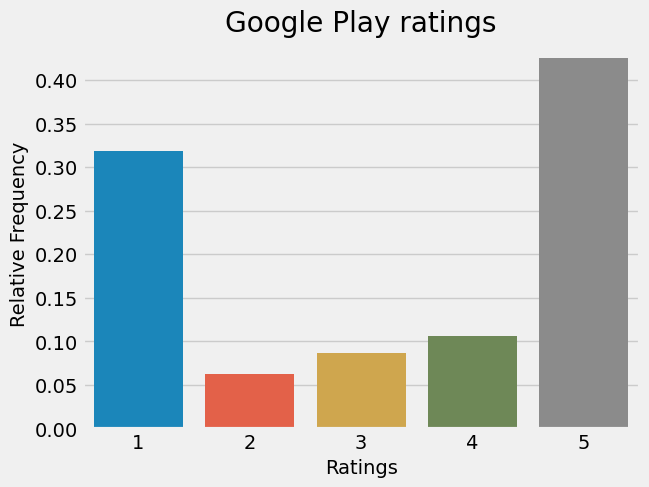

In [985]:
plt.style.use("fivethirtyeight")
sns.barplot(x = data_summary.columns, y = data_summary.iloc[1, :])
plt.title("Google Play ratings")
plt.xlabel("Ratings")
plt.ylabel("Relative Frequency")
plt.show()

### Google Play descriptive analysis

In [986]:
print(f"Average App rating : {data[data['source'] == 'Google Play']['rating'].mean() : .3f}")
g_mode = data[data['source'] == 'Google Play']['rating'].mode()[0]
print(f"Most frequent App rating : {g_mode}")

Average App rating :  3.257
Most frequent App rating : 5


## App Store

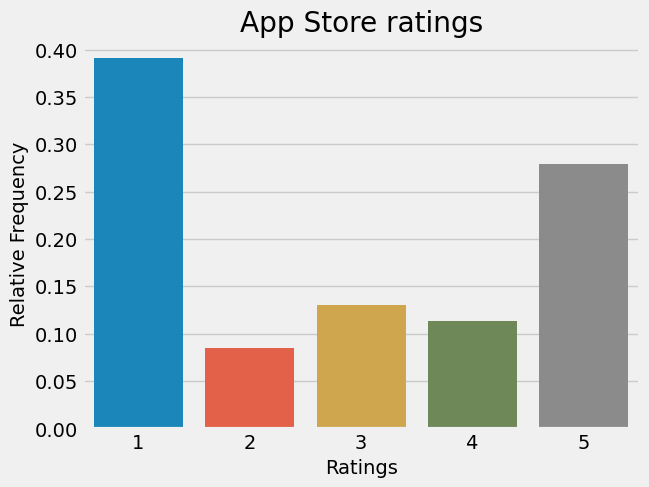

In [987]:
sns.barplot(x = data_summary.columns, y = data_summary.iloc[0, :])
plt.title("App Store ratings")
plt.xlabel("Ratings")
plt.ylabel("Relative Frequency")
plt.show()

### App store Descriptive Analysis

In [988]:
print(f"Average App rating : {data[data['source'] == 'App Store']['rating'].mean() : .3f}")
a_mode = data[data['source'] == 'App Store']['rating'].mode()[0]
print(f"Most frequent App rating : {a_mode}")

Average App rating :  2.806
Most frequent App rating : 1


# Natural Language Processing

In [989]:
reviews = data["review_description"]
reviews[:5]

0    Meh. Not the greatest experience on a Chromebo...
1    Pretty good for a first launch!! Its easy to u...
2    For a brand new app, it's very well optimized....
3    Great app with a lot of potential! However, th...
4    The app is good, but it needs a lot of functio...
Name: review_description, dtype: object

#### Extracting only alphabetical characters from the Reviews

In [991]:
reviews = [re.sub("[^a-zA-Z]"," ",review).lower().split() for review in reviews]

In [993]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Removing some valuable words from stopwrods

In [994]:
filtered_stopwords = stopwords.words("english")
filtered_stopwords.remove("no")
filtered_stopwords.remove("nor")
filtered_stopwords.remove("not")
filtered_stopwords.remove("very")
filtered_stopwords.remove("don't")
filtered_stopwords.remove("don")
filtered_stopwords.remove("ain")
filtered_stopwords.remove("aren")
filtered_stopwords.remove("aren't")
filtered_stopwords.remove("couldn")
filtered_stopwords.remove("couldn't")
filtered_stopwords.remove("didn")
filtered_stopwords.remove("didn't")
filtered_stopwords.remove("doesn")
filtered_stopwords.remove("doesn't")
filtered_stopwords.remove("hadn")
filtered_stopwords.remove("hadn't")
filtered_stopwords.remove("hasn")
filtered_stopwords.remove("hasn't")
filtered_stopwords.remove("haven")
filtered_stopwords.remove("haven't")
filtered_stopwords.remove("isn")
filtered_stopwords.remove("isn't")
filtered_stopwords.remove("mightn")
filtered_stopwords.remove("mightn't")
filtered_stopwords.remove("mustn't")
filtered_stopwords.remove("needn't")
filtered_stopwords.remove("shan't")
filtered_stopwords.remove("shouldn't")
filtered_stopwords.remove("wasn't")
filtered_stopwords.remove("wouldn't")
filtered_stopwords.remove("won't")
filtered_stopwords.remove("weren't")

#### Stemming Words

In [995]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stemmed_reviews = []
for review in reviews:
    review = [stemmer.stem(word) for word in review if word not in filtered_stopwords]
    stemmed_reviews.append(review)

#### Making a list of Stemmed Reviews by joing the stemmed words

In [997]:
reviews = [' '.join(review) for review in stemmed_reviews]
reviews[1]

'pretti good first launch easi use self explanatori say algorithm good well great potenti thing need improv abil use hashtag would make easier find topic peopl interest option follow feed would major improv especi chronolog order abil choos imag album rather recent photo abil save photo phone'

## Tokenization of Reviews

In [998]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 12000)
X = vectorizer.fit_transform(reviews)

In [1000]:
Y = data['rating'].values
Y.shape

(27228,)

### Label Encoding the 'source' column

In [1001]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
sources = encoder.fit_transform(data['source'].values)

#### Adding this column to the Feature Matrix

In [1003]:
X = np.concatenate([sources.reshape(-1, 1), X.toarray()], axis = 1)

## Train and Test set split

In [1005]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [1006]:
Y_test_eval = np.copy(Y_test)

## Artificial Neural Network Model

#### Import Library

In [1007]:
import tensorflow as tf

#### Initialize the Sequentaial Neural Network

In [1008]:
ann = tf.keras.Sequential()

#### Dense Layers

In [1009]:
from tensorflow.keras.regularizers import l1

In [1010]:
ann.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 128, activation = 'relu' , kernel_regularizer = l1(0.01)))
ann.add(tf.keras.layers.Dense(units = 128, activation = 'relu', kernel_regularizer = l1(0.0035)))

#### Output Layer

In [1011]:
ann.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

### Compile the Model

In [1012]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### One-Hot-Encoding the Target Label

In [1013]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
Y_train = transformer.fit_transform(Y_train.reshape(-1, 1))
Y_test = transformer.transform(Y_test.reshape(-1, 1))

In [1014]:
Y_train = Y_train.toarray()
Y_test = Y_test.toarray()

### Train the Model

In [1015]:
ann.fit(x = X_train, y = Y_train, validation_data = (X_test, Y_test), batch_size = 32, epochs = 8)

Epoch 1/8
639/639 [==============================] - 9s 13ms/step - loss: 2.5519 - accuracy: 0.5643 - val_loss: 1.1621 - val_accuracy: 0.6299
Epoch 2/8
639/639 [==============================] - 8s 12ms/step - loss: 1.0833 - accuracy: 0.6535 - val_loss: 1.0926 - val_accuracy: 0.6552
Epoch 3/8
639/639 [==============================] - 8s 12ms/step - loss: 0.9955 - accuracy: 0.6862 - val_loss: 1.0890 - val_accuracy: 0.6596
Epoch 4/8
639/639 [==============================] - 8s 12ms/step - loss: 0.9397 - accuracy: 0.7066 - val_loss: 1.1131 - val_accuracy: 0.6492
Epoch 5/8
639/639 [==============================] - 8s 12ms/step - loss: 0.8957 - accuracy: 0.7245 - val_loss: 1.1208 - val_accuracy: 0.6524
Epoch 6/8
639/639 [==============================] - 8s 12ms/step - loss: 0.8583 - accuracy: 0.7367 - val_loss: 1.1455 - val_accuracy: 0.6514
Epoch 7/8
639/639 [==============================] - 8s 12ms/step - loss: 0.8268 - accuracy: 0.7503 - val_loss: 1.1730 - val_accuracy: 0.6452
Epoch 

## Performance on Test set

In [1016]:
Y_pred = []
pred_probas = ann.predict(X_test)
for p in pred_probas:
    Y_pred.append(np.argmax(p))

213/213 [==============================] - 1s 3ms/step


In [1017]:
Y_pred = np.array(Y_pred).astype('int32') + 1

In [1018]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
print(confusion_matrix(Y_test_eval, Y_pred))
print(f"Accuracy : {accuracy_score(Y_test_eval, Y_pred) : .3f}")
print(f"Recall : {recall_score(Y_test_eval, Y_pred, average = 'macro') : .3f}")
print(f"Precision : {precision_score(Y_test_eval, Y_pred, average = 'macro') : .3f}")
      

[[1768   12   87   17  336]
 [ 278   10   75   22   75]
 [ 215    9  140   71  147]
 [ 154    7  101  102  379]
 [ 309    0   45  110 2338]]
Accuracy :  0.640
Recall :  0.406
Precision :  0.451


## Single Review Prediction

In [1052]:
text = "I loved this app !"
text = re.sub("[^a-zA-Z]", " ", text).split()
text = [stemmer.stem(word) for word in text if word not in filtered_stopwords]
text = ' '.join(text)
text = [text]
review = vectorizer.transform(text)

In [1053]:
review = np.concatenate([encoder.transform(np.array(["Google Play"])).reshape(-1, 1), review.toarray()], axis = 1)

In [1055]:
probabs = ann.predict(review)
max1_ = float('-inf')
max2_ = float('-inf')
maxIndex1 = -1
maxIndex2 = -1
for p in enumerate(probabs[0]):
    if(p[1] > max1_):
        max2_ = max1_
        max1_ = p[1]
        maxIndex2 = maxIndex1
        maxIndex1 = p[0]
    elif p[1] > max2_:
        max2_ = p[1]
        maxIndex2 = p[0]

1/1 [==============================] - 0s 34ms/step


In [1056]:
rating = (maxIndex1+1 + maxIndex2 + 1) / 2

In [1057]:
print(f"Rating is predicted as : {np.round(rating, decimals = 1)}")

Rating is predicted as : 4.5
